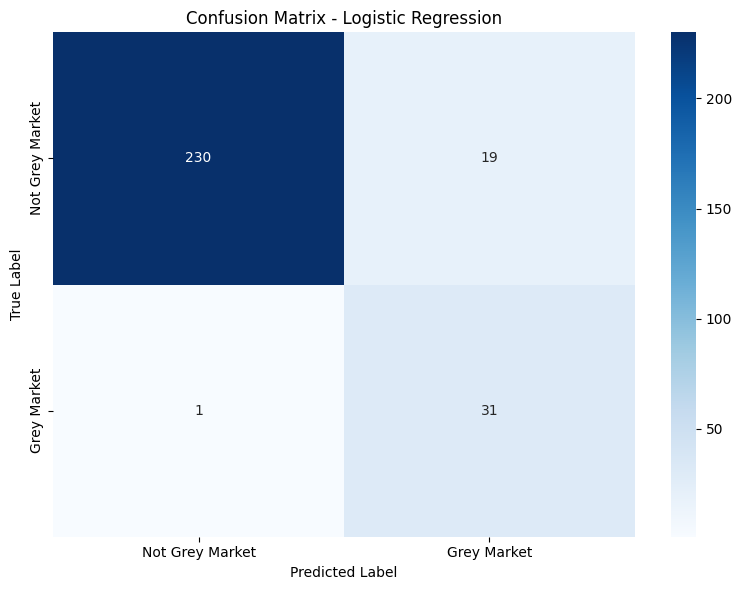

Confusion Matrix:
[[230  19]
 [  1  31]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       249
           1       0.62      0.97      0.76        32

    accuracy                           0.93       281
   macro avg       0.81      0.95      0.86       281
weighted avg       0.95      0.93      0.94       281


ROC-AUC: 0.9764056224899598

Model saved as logistic_grey_market_model.pkl


In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv("Final-snapdeal-dataset.csv")

X = df[[
    "Product_Title",
    "Selling_Price",
    "MRP",
    "Discount_Pct",
    "Review_Count"
]]

y = df["Is_Grey_Market"]

preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(
                max_features=4000,
                ngram_range=(1, 2),
                min_df=2,
                stop_words="english"
            ),
            "Product_Title"
        ),
        (
            "num",
            StandardScaler(),
            ["Selling_Price", "MRP", "Discount_Pct", "Review_Count"]
        )
    ]
)

model = Pipeline(
    steps=[
        (
            "preprocessor",
            preprocessor
        ),
        (
            "classifier",
            LogisticRegression(
                max_iter=2000,
                class_weight="balanced",
                solver="liblinear",
                random_state=42
            )
        )
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Grey Market', 'Grey Market'],
            yticklabels=['Not Grey Market', 'Grey Market'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

joblib.dump(model, "logistic_grey_market_model.pkl")
print("\nModel saved as logistic_grey_market_model.pkl")

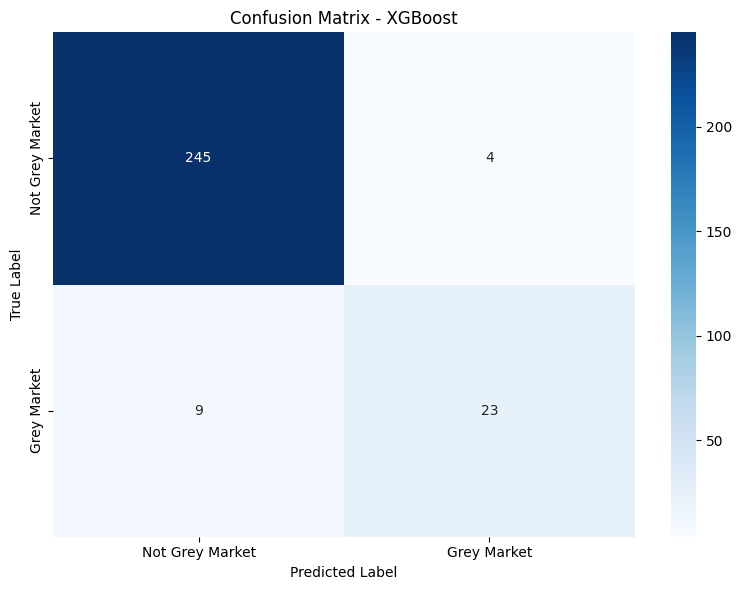

Confusion Matrix:
[[245   4]
 [  9  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       249
           1       0.85      0.72      0.78        32

    accuracy                           0.95       281
   macro avg       0.91      0.85      0.88       281
weighted avg       0.95      0.95      0.95       281


ROC-AUC: 0.990336345381526

Model saved as grey_market_xgboost_model.pkl


In [4]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier

df = pd.read_csv("Final-snapdeal-dataset.csv")

X = df[
    [
        "Product_Title",
        "Selling_Price",
        "MRP",
        "Discount_Pct",
        "Review_Count"
    ]
]

y = df["Is_Grey_Market"]

pos_weight = (y == 0).sum() / (y == 1).sum()

preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(
                max_features=4000,
                ngram_range=(1, 2),
                min_df=2,
                stop_words="english"
            ),
            "Product_Title"
        ),
        (
            "num",
            StandardScaler(),
            ["Selling_Price", "MRP", "Discount_Pct", "Review_Count"]
        )
    ]
)

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", xgb_model)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Grey Market', 'Grey Market'],
            yticklabels=['Not Grey Market', 'Grey Market'])
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

joblib.dump(model, "grey_market_xgboost_model.pkl")
print("\nModel saved as grey_market_xgboost_model.pkl")